# factor calculate

In [10]:
import pandas as pd
import numpy as np

In [11]:
BTCUSDT_2021_1_1_to_2024_6_1_with_1h  = pd.read_csv('BTCUSDT_2021_1_1_to_2024_6_1_with_1h.csv')
BTCUSDT_2021_1_1_to_2024_6_1_with_1h['date_time'] = pd.to_datetime(BTCUSDT_2021_1_1_to_2024_6_1_with_1h['date_time'])
BTCUSDT_2021_1_1_to_2024_6_1_with_1h['real_time'] = pd.to_datetime(BTCUSDT_2021_1_1_to_2024_6_1_with_1h['real_time'])
BTCUSDT_2021_1_1_to_2024_6_1_with_1h

,date_time,real_time,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,2021-01-01 00:01:00,2021-01-01 00:00:00,1609459200000,28948.19,29055.00,28706.00,29015.00,8037.588,1.609463e+12,2.321646e+08,65942.0,3983.842,1.151312e+08
1,2021-01-01 01:01:00,2021-01-01 01:00:00,1609462800000,29015.00,29546.42,28975.46,29448.40,19543.401,1.609466e+12,5.736394e+08,127126.0,10386.352,3.048663e+08
2,2021-01-01 02:01:00,2021-01-01 02:00:00,1609466400000,29443.65,29500.00,29159.16,29237.06,10049.720,1.609470e+12,2.946641e+08,69148.0,4513.355,1.323593e+08
3,2021-01-01 03:01:00,2021-01-01 03:00:00,1609470000000,29236.58,29379.41,29174.95,29302.11,5579.452,1.609474e+12,1.633982e+08,47082.0,2969.050,8.697145e+07
4,2021-01-01 04:01:00,2021-01-01 04:00:00,1609473600000,29302.11,29422.32,29086.00,29237.07,8351.683,1.609477e+12,2.443911e+08,59332.0,3661.258,1.071895e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29923,2024-05-31 19:01:00,2024-05-31 19:00:00,1717182000000,67456.20,68059.40,67388.20,67719.90,12522.881,1.717186e+12,8.486403e+08,145735.0,6950.388,4.710058e+08
29924,2024-05-31 20:01:00,2024-05-31 20:00:00,1717185600000,67720.00,67834.40,67633.10,67755.00,3592.345,1.717189e+12,2.433091e+08,57772.0,1701.252,1.152285e+08
29925,2024-05-31 21:01:00,2024-05-31 21:00:00,1717189200000,67755.00,67763.00,67557.70,67602.30,2543.573,1.717193e+12,1.720847e+08,42362.0,1088.662,7.364917e+07
29926,2024-05-31 22:01:00,2024-05-31 22:00:00,1717192800000,67602.50,67708.80,67529.80,67537.30,1783.136,1.717196e+12,1.206056e+08,33471.0,779.505,5.272988e+07


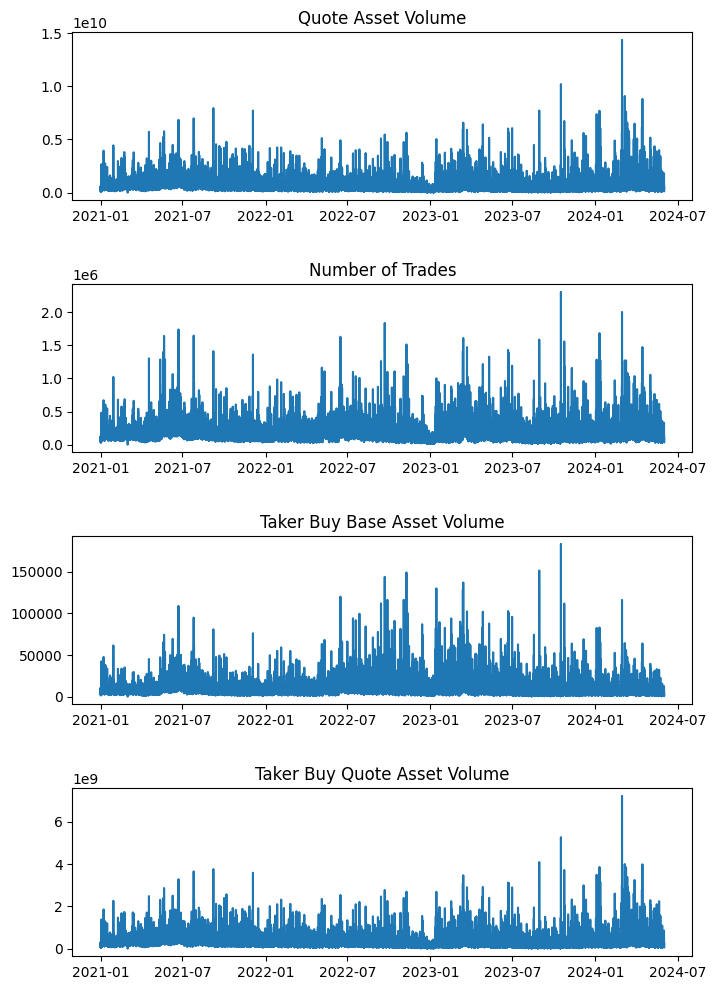

In [12]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(8, 12))
ax1.plot('date_time', 'quote_asset_volume', data=BTCUSDT_2021_1_1_to_2024_6_1_with_1h)
ax1.set_title('Quote Asset Volume')
ax2.plot('date_time', 'number_of_trades', data=BTCUSDT_2021_1_1_to_2024_6_1_with_1h)
ax2.set_title('Number of Trades')
ax3.plot('date_time', 'taker_buy_base_asset_volume', data=BTCUSDT_2021_1_1_to_2024_6_1_with_1h)
ax3.set_title('Taker Buy Base Asset Volume')
ax4.plot('date_time', 'taker_buy_quote_asset_volume', data=BTCUSDT_2021_1_1_to_2024_6_1_with_1h)
ax4.set_title('Taker Buy Quote Asset Volume')

plt.subplots_adjust(hspace=0.5)
plt.show()

In [13]:
df = BTCUSDT_2021_1_1_to_2024_6_1_with_1h.copy()
df.set_index('date_time', inplace=True)
hours_in_day = 24
df['return_1h'] = df['close'].pct_change(periods=1)  # 向前1小时
df['return_4h'] = df['close'].pct_change(periods=4)  # 向前4小时
df['return_8h'] = df['close'].pct_change(periods=8)  # 向前8小时
df['return_1d'] = df['close'].pct_change(periods=hours_in_day)  # 向前1天
df['return_3d'] = df['close'].pct_change(periods=3 * hours_in_day)  # 向前3天
df['return_7d'] = df['close'].pct_change(periods=7 * hours_in_day)  # 向前7天
df['return_14d'] = df['close'].pct_change(periods=14 * hours_in_day)  # 向前14天

# df['log_return_1h'] = np.log(df['close'] / df['close'].shift(1))  # 向前1小时的对数收益率
# df['log_return_4h'] = np.log(df['close'] / df['close'].shift(4))  # 向前4小时的对数收益率
# df['log_return_8h'] = np.log(df['close'] / df['close'].shift(8))  # 向前8小时的对数收益率
# df['log_return_1d'] = np.log(df['close'] / df['close'].shift(24))  # 向前1天的对数收益率
# df['log_return_3d'] = np.log(df['close'] / df['close'].shift(3*24))  # 向前3天的对数收益率
# df['log_return_7d'] = np.log(df['close'] / df['close'].shift(7*24))  # 向前7天的对数收益率
# df['log_return_14d'] = np.log(df['close'] / df['close'].shift(14*24))  # 向前14天的对数收益率

df

,real_time,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,return_1h,return_4h,return_8h,return_1d,return_3d,return_7d,return_14d
date_time,,,,,,,,,,,,,,,,,,,
2021-01-01 00:01:00,2021-01-01 00:00:00,1609459200000,28948.19,29055.00,28706.00,29015.00,8037.588,1.609463e+12,2.321646e+08,65942.0,3983.842,1.151312e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 01:01:00,2021-01-01 01:00:00,1609462800000,29015.00,29546.42,28975.46,29448.40,19543.401,1.609466e+12,5.736394e+08,127126.0,10386.352,3.048663e+08,0.014937,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 02:01:00,2021-01-01 02:00:00,1609466400000,29443.65,29500.00,29159.16,29237.06,10049.720,1.609470e+12,2.946641e+08,69148.0,4513.355,1.323593e+08,-0.007177,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 03:01:00,2021-01-01 03:00:00,1609470000000,29236.58,29379.41,29174.95,29302.11,5579.452,1.609474e+12,1.633982e+08,47082.0,2969.050,8.697145e+07,0.002225,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 04:01:00,2021-01-01 04:00:00,1609473600000,29302.11,29422.32,29086.00,29237.07,8351.683,1.609477e+12,2.443911e+08,59332.0,3661.258,1.071895e+08,-0.002220,0.007654,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31 19:01:00,2024-05-31 19:00:00,1717182000000,67456.20,68059.40,67388.20,67719.90,12522.881,1.717186e+12,8.486403e+08,145735.0,6950.388,4.710058e+08,0.003911,0.006947,-0.009766,-0.014338,-0.010905,-0.020361,0.010632
2024-05-31 20:01:00,2024-05-31 20:00:00,1717185600000,67720.00,67834.40,67633.10,67755.00,3592.345,1.717189e+12,2.433091e+08,57772.0,1701.252,1.152285e+08,0.000518,0.007629,-0.013361,-0.011245,-0.008981,-0.015906,0.013460
2024-05-31 21:01:00,2024-05-31 21:00:00,1717189200000,67755.00,67763.00,67557.70,67602.30,2543.573,1.717193e+12,1.720847e+08,42362.0,1088.662,7.364917e+07,-0.002254,0.003289,-0.007582,-0.012566,-0.012165,-0.018778,0.012327


## close_time
## quote_asset_volume

In [14]:
# 计算1h, 4h, 8h, 1d, 3d, 7d, 14d的SMA
df['qav_SMA_1h'] = df['quote_asset_volume'].rolling('2H').mean()
df['qav_SMA_4h'] = df['quote_asset_volume'].rolling('4H').mean()
df['qav_SMA_4h'] = df['quote_asset_volume'].rolling('4H').mean()
df['qav_SMA_8h'] = df['quote_asset_volume'].rolling('8H').mean()
df['qav_SMA_1d'] = df['quote_asset_volume'].rolling('24H').mean()
df['qav_SMA_3d'] = df['quote_asset_volume'].rolling('3D').mean()
df['qav_SMA_7d'] = df['quote_asset_volume'].rolling('7D').mean()
df['qav_SMA_14d'] = df['quote_asset_volume'].rolling('14D').mean()
# 计算6h, 12h, 24h, 和7d的EMA
df['qav_EMA_1h'] = df['quote_asset_volume'].ewm(span=2, adjust=False).mean()
df['qav_EMA_4h'] = df['quote_asset_volume'].ewm(span=4, adjust=False).mean()
df['qav_EMA_8h'] = df['quote_asset_volume'].ewm(span=8, adjust=False).mean()
df['qav_EMA_1d'] = df['quote_asset_volume'].ewm(span=24, adjust=False).mean()
df['qav_EMA_3d'] = df['quote_asset_volume'].ewm(span=72, adjust=False).mean()
df['qav_EMA_7d'] = df['quote_asset_volume'].ewm(span=168, adjust=False).mean()
df['qav_EMA_14d'] = df['quote_asset_volume'].ewm(span=336, adjust=False).mean()
# 成交笔数与历史平均成交笔数的差异
df['qav_Diff_SMA_1h'] = df['quote_asset_volume'] - df['qav_SMA_1h']
df['qav_Diff_SMA_4h'] = df['quote_asset_volume'] - df['qav_SMA_4h']
df['qav_Diff_SMA_8h'] = df['quote_asset_volume'] - df['qav_SMA_8h']
df['qav_Diff_SMA_1d'] = df['quote_asset_volume'] - df['qav_SMA_1d']
df['qav_Diff_SMA_3d'] = df['quote_asset_volume'] - df['qav_SMA_3d']
df['qav_Diff_SMA_7d'] = df['quote_asset_volume'] - df['qav_SMA_7d']
df['qav_Diff_SMA_14d'] = df['quote_asset_volume'] - df['qav_SMA_14d']
# 成交笔数与前一交易时间成交笔数的差异
df['qav_Diff_Trade'] = df['quote_asset_volume'].diff()
# 成交笔数的历史波动率
df['qav_Volatility_1h'] = df['quote_asset_volume'].rolling(window='2H').std()
df['qav_Volatility_4h'] = df['quote_asset_volume'].rolling(window='4H').std()
df['qav_Volatility_8h'] = df['quote_asset_volume'].rolling(window='8H').std()
df['qav_Volatility_1d'] = df['quote_asset_volume'].rolling(window='1D').std()
df['qav_Volatility_3d'] = df['quote_asset_volume'].rolling(window='3D').std()
df['qav_Volatility_7d'] = df['quote_asset_volume'].rolling(window='7D').std()
df['qav_Volatility_14d'] = df['quote_asset_volume'].rolling(window='14D').std()
# 计算涨跌幅
df['qav_Quote_change_1h'] = (df['quote_asset_volume'] - df['quote_asset_volume'].shift(periods=1)) / df['quote_asset_volume'].shift(periods=1) * 100
df['qav_Quote_change_4h'] = (df['quote_asset_volume'] - df['quote_asset_volume'].shift(periods=4)) / df['quote_asset_volume'].shift(periods=4) * 100
df['qav_Quote_change_8h'] = (df['quote_asset_volume'] - df['quote_asset_volume'].shift(periods=8)) / df['quote_asset_volume'].shift(periods=8) * 100
df['qav_Quote_change_1d'] = (df['quote_asset_volume'] - df['quote_asset_volume'].shift(periods=24)) / df['quote_asset_volume'].shift(periods=24) * 100
df['qav_Quote_change_3d'] = (df['quote_asset_volume'] - df['quote_asset_volume'].shift(periods=72)) / df['quote_asset_volume'].shift(periods=72) * 100
df['qav_Quote_change_7d'] = (df['quote_asset_volume'] - df['quote_asset_volume'].shift(periods=168)) / df['quote_asset_volume'].shift(periods=168) * 100
df['qav_Quote_change_14d'] = (df['quote_asset_volume'] - df['quote_asset_volume'].shift(periods=336)) / df['quote_asset_volume'].shift(periods=336) * 100
# 计算成交笔数动量指数
df['qav_TVMI_1h'] = (df['quote_asset_volume'] - df['qav_SMA_1h']) / df['qav_SMA_1h'] * 100
df['qav_TVMI_4h'] = (df['quote_asset_volume'] - df['qav_SMA_4h']) / df['qav_SMA_4h'] * 100
df['qav_TVMI_8h'] = (df['quote_asset_volume'] - df['qav_SMA_8h']) / df['qav_SMA_8h'] * 100
df['qav_TVMI_1d'] = (df['quote_asset_volume'] - df['qav_SMA_1d']) / df['qav_SMA_1d'] * 100
df['qav_TVMI_3d'] = (df['quote_asset_volume'] - df['qav_SMA_3d']) / df['qav_SMA_3d'] * 100
df['qav_TVMI_7d'] = (df['quote_asset_volume'] - df['qav_SMA_7d']) / df['qav_SMA_7d'] * 100
df['qav_TVMI_14d'] = (df['quote_asset_volume'] - df['qav_SMA_14d']) / df['qav_SMA_14d'] * 100
# 计算动量振荡器（TVMOs）
qav_rolling_max_1h = df['quote_asset_volume'].rolling('2H').max()
qav_rolling_min_1h = df['quote_asset_volume'].rolling('2H').min()
df['qav_TVMO_1h'] = (df['quote_asset_volume'] - df['qav_SMA_1h']) / (qav_rolling_max_1h - qav_rolling_min_1h) * 100
qav_rolling_max_4h = df['quote_asset_volume'].rolling('4H').max()
qav_rolling_min_4h = df['quote_asset_volume'].rolling('4H').min()
df['qav_TVMO_4h'] = (df['quote_asset_volume'] - df['qav_SMA_4h']) / (qav_rolling_max_4h - qav_rolling_min_4h) * 100
qav_rolling_max_8h = df['quote_asset_volume'].rolling('8H').max()
qav_rolling_min_8h = df['quote_asset_volume'].rolling('8H').min()
df['qav_TVMO_8h'] = (df['quote_asset_volume'] - df['qav_SMA_8h']) / (qav_rolling_max_8h - qav_rolling_min_8h) * 100
qav_rolling_max_1d = df['quote_asset_volume'].rolling('1D').max()
qav_rolling_min_1d = df['quote_asset_volume'].rolling('1D').min()
df['qav_TVMO_1d'] = (df['quote_asset_volume'] - df['qav_SMA_1d']) / (qav_rolling_max_1d - qav_rolling_min_1d) * 100
qav_rolling_max_3d = df['quote_asset_volume'].rolling('3D').max()
qav_rolling_min_3d = df['quote_asset_volume'].rolling('3D').min()
df['qav_TVMO_3d'] = (df['quote_asset_volume'] - df['qav_SMA_3d']) / (qav_rolling_max_3d - qav_rolling_min_3d) * 100
qav_rolling_max_7d = df['quote_asset_volume'].rolling('7D').max()
qav_rolling_min_7d = df['quote_asset_volume'].rolling('7D').min()
df['qav_TVMO_7d'] = (df['quote_asset_volume'] - df['qav_SMA_7d']) / (qav_rolling_max_7d - qav_rolling_min_7d) * 100
qav_rolling_max_14d = df['quote_asset_volume'].rolling('14D').max()
qav_rolling_min_14d = df['quote_asset_volume'].rolling('14D').min()
df['qav_TVMO_14d'] = (df['quote_asset_volume'] - df['qav_SMA_14d']) / (qav_rolling_max_14d - qav_rolling_min_14d) * 100
df['qav_trade_close_ratio'] = df['quote_asset_volume']/ df['close']
df['qav_trades_volume_ratio'] = df['quote_asset_volume'] / df['volume']

## number_of_trades

**1. 成交笔数因子**:

  - 成交笔数因子(number_of_trades)

  - 平均成交笔数(SMA):
    - 1h, 4h, 8h, 1d, 3d, 7d, 14d

  - 成交笔数的指数移动平均(Exponential Moving Average, EMA):
    - 1h, 4h, 8h, 1d, 3d, 7d, 14d

  - 成交笔数与历史平均成交笔数的差异
    - 1h, 4h, 8h, 1d, 3d, 7d, 14d

  - 成交笔数与前一交易时间成交笔数的差异


**2. 成交笔数动量因子**:
  - 成交笔数的历史波动率
    - 1h, 4h, 8h, 1d, 3d, 7d, 14d

  - 成交笔数的涨跌幅
    - 1h, 4h, 8h, 1d, 3d, 7d, 14d

  - 成交笔数的动量指标
    - 成交笔数动量指数(Transaction Volume Momentum Index, TVMI)
      - 1h, 4h, 8h, 1d, 3d, 7d, 14d
    - 成交笔数动量振荡器(Transaction Volume Momentum Oscillator, TVMO)
      - 1h, 4h, 8h, 1d, 3d, 7d, 14d
    - 成交笔数动量差(Transaction Volume Momentum Differential, TVMD)
      - 1h, 4h, 8h, 1d, 3d, 7d, 14d

  - 成交笔数与收盘价的相关性
  
  - 成交笔数与交易量的比率

**3. 成交笔数分布因子**:
  
  - 成交笔数在5个区间的分布
  
  - 成交笔数的Kurtosis
  
  - 成交笔数的Skewness

  - 单位成交量的交易次数


In [15]:
# 计算1h, 4h, 8h, 1d, 3d, 7d, 14d的SMA
df['SMA_1h'] = df['number_of_trades'].rolling('2H').mean()
df['SMA_4h'] = df['number_of_trades'].rolling('4H').mean()
df['SMA_4h'] = df['number_of_trades'].rolling('4H').mean()
df['SMA_8h'] = df['number_of_trades'].rolling('8H').mean()
df['SMA_1d'] = df['number_of_trades'].rolling('24H').mean()
df['SMA_3d'] = df['number_of_trades'].rolling('3D').mean()
df['SMA_7d'] = df['number_of_trades'].rolling('7D').mean()
df['SMA_14d'] = df['number_of_trades'].rolling('14D').mean()
# 计算6h, 12h, 24h, 和7d的EMA
df['EMA_1h'] = df['number_of_trades'].ewm(span=2, adjust=False).mean()
df['EMA_4h'] = df['number_of_trades'].ewm(span=4, adjust=False).mean()
df['EMA_8h'] = df['number_of_trades'].ewm(span=8, adjust=False).mean()
df['EMA_1d'] = df['number_of_trades'].ewm(span=24, adjust=False).mean()
df['EMA_3d'] = df['number_of_trades'].ewm(span=72, adjust=False).mean()
df['EMA_7d'] = df['number_of_trades'].ewm(span=168, adjust=False).mean()
df['EMA_14d'] = df['number_of_trades'].ewm(span=336, adjust=False).mean()
# 成交笔数与历史平均成交笔数的差异
df['Diff_SMA_1h'] = df['number_of_trades'] - df['SMA_1h']
df['Diff_SMA_4h'] = df['number_of_trades'] - df['SMA_4h']
df['Diff_SMA_8h'] = df['number_of_trades'] - df['SMA_8h']
df['Diff_SMA_1d'] = df['number_of_trades'] - df['SMA_1d']
df['Diff_SMA_3d'] = df['number_of_trades'] - df['SMA_3d']
df['Diff_SMA_7d'] = df['number_of_trades'] - df['SMA_7d']
df['Diff_SMA_14d'] = df['number_of_trades'] - df['SMA_14d']
# 成交笔数与前一交易时间成交笔数的差异
df['Diff_Trade'] = df['number_of_trades'].diff()
# 成交笔数的历史波动率
df['Volatility_1h'] = df['number_of_trades'].rolling(window='2H').std()
df['Volatility_4h'] = df['number_of_trades'].rolling(window='4H').std()
df['Volatility_8h'] = df['number_of_trades'].rolling(window='8H').std()
df['Volatility_1d'] = df['number_of_trades'].rolling(window='1D').std()
df['Volatility_3d'] = df['number_of_trades'].rolling(window='3D').std()
df['Volatility_7d'] = df['number_of_trades'].rolling(window='7D').std()
df['Volatility_14d'] = df['number_of_trades'].rolling(window='14D').std()
# 计算涨跌幅
df['Quote_change_1h'] = (df['number_of_trades'] - df['number_of_trades'].shift(periods=1)) / df['number_of_trades'].shift(periods=1) * 100
df['Quote_change_4h'] = (df['number_of_trades'] - df['number_of_trades'].shift(periods=4)) / df['number_of_trades'].shift(periods=4) * 100
df['Quote_change_8h'] = (df['number_of_trades'] - df['number_of_trades'].shift(periods=8)) / df['number_of_trades'].shift(periods=8) * 100
df['Quote_change_1d'] = (df['number_of_trades'] - df['number_of_trades'].shift(periods=24)) / df['number_of_trades'].shift(periods=24) * 100
df['Quote_change_3d'] = (df['number_of_trades'] - df['number_of_trades'].shift(periods=72)) / df['number_of_trades'].shift(periods=72) * 100
df['Quote_change_7d'] = (df['number_of_trades'] - df['number_of_trades'].shift(periods=168)) / df['number_of_trades'].shift(periods=168) * 100
df['Quote_change_14d'] = (df['number_of_trades'] - df['number_of_trades'].shift(periods=336)) / df['number_of_trades'].shift(periods=336) * 100
# 计算成交笔数动量指数
df['TVMI_1h'] = (df['number_of_trades'] - df['SMA_1h']) / df['SMA_1h'] * 100
df['TVMI_4h'] = (df['number_of_trades'] - df['SMA_4h']) / df['SMA_4h'] * 100
df['TVMI_8h'] = (df['number_of_trades'] - df['SMA_8h']) / df['SMA_8h'] * 100
df['TVMI_1d'] = (df['number_of_trades'] - df['SMA_1d']) / df['SMA_1d'] * 100
df['TVMI_3d'] = (df['number_of_trades'] - df['SMA_3d']) / df['SMA_3d'] * 100
df['TVMI_7d'] = (df['number_of_trades'] - df['SMA_7d']) / df['SMA_7d'] * 100
df['TVMI_14d'] = (df['number_of_trades'] - df['SMA_14d']) / df['SMA_14d'] * 100
# 计算动量振荡器（TVMOs）
rolling_max_1h = df['number_of_trades'].rolling('2H').max()
rolling_min_1h = df['number_of_trades'].rolling('2H').min()
df['TVMO_1h'] = (df['number_of_trades'] - df['SMA_1h']) / (rolling_max_1h - rolling_min_1h) * 100
rolling_max_4h = df['number_of_trades'].rolling('4H').max()
rolling_min_4h = df['number_of_trades'].rolling('4H').min()
df['TVMO_4h'] = (df['number_of_trades'] - df['SMA_4h']) / (rolling_max_4h - rolling_min_4h) * 100
rolling_max_8h = df['number_of_trades'].rolling('8H').max()
rolling_min_8h = df['number_of_trades'].rolling('8H').min()
df['TVMO_8h'] = (df['number_of_trades'] - df['SMA_8h']) / (rolling_max_8h - rolling_min_8h) * 100
rolling_max_1d = df['number_of_trades'].rolling('1D').max()
rolling_min_1d = df['number_of_trades'].rolling('1D').min()
df['TVMO_1d'] = (df['number_of_trades'] - df['SMA_1d']) / (rolling_max_1d - rolling_min_1d) * 100
rolling_max_3d = df['number_of_trades'].rolling('3D').max()
rolling_min_3d = df['number_of_trades'].rolling('3D').min()
df['TVMO_3d'] = (df['number_of_trades'] - df['SMA_3d']) / (rolling_max_3d - rolling_min_3d) * 100
rolling_max_7d = df['number_of_trades'].rolling('7D').max()
rolling_min_7d = df['number_of_trades'].rolling('7D').min()
df['TVMO_7d'] = (df['number_of_trades'] - df['SMA_7d']) / (rolling_max_7d - rolling_min_7d) * 100
rolling_max_14d = df['number_of_trades'].rolling('14D').max()
rolling_min_14d = df['number_of_trades'].rolling('14D').min()
df['TVMO_14d'] = (df['number_of_trades'] - df['SMA_14d']) / (rolling_max_14d - rolling_min_14d) * 100
df['trade_close_ratio'] = df['number_of_trades']/ df['close']
df['trades_volume_ratio'] = df['number_of_trades'] / df['volume']

C:\Users\Young\AppData\Local\Temp\ipykernel_3872\3354023123.py:47: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['TVMI_8h'] = (df['number_of_trades'] - df['SMA_8h']) / df['SMA_8h'] * 100
C:\Users\Young\AppData\Local\Temp\ipykernel_3872\3354023123.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['TVMI_1d'] = (df['number_of_trades'] - df['SMA_1d']) / df['SMA_1d'] * 100
C:\Users\Young\AppData\Local\Temp\ipykernel_3872\3354023123.py:49: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of call

## taker_buy_base_asset_volume

In [16]:
# 计算1h, 4h, 8h, 1d, 3d, 7d, 14d的SMA
df['base_asset_SMA_1h'] = df['taker_buy_base_asset_volume'].rolling('2H').mean()
df['base_asset_SMA_4h'] = df['taker_buy_base_asset_volume'].rolling('4H').mean()
df['base_asset_SMA_4h'] = df['taker_buy_base_asset_volume'].rolling('4H').mean()
df['base_asset_SMA_8h'] = df['taker_buy_base_asset_volume'].rolling('8H').mean()
df['base_asset_SMA_1d'] = df['taker_buy_base_asset_volume'].rolling('24H').mean()
df['base_asset_SMA_3d'] = df['taker_buy_base_asset_volume'].rolling('3D').mean()
df['base_asset_SMA_7d'] = df['taker_buy_base_asset_volume'].rolling('7D').mean()
df['base_asset_SMA_14d'] = df['taker_buy_base_asset_volume'].rolling('14D').mean()
# 计算1h, 4h, 8h, 1d, 3d, 7d, 14d的EMA
df['base_asset_EMA_1h'] = df['taker_buy_base_asset_volume'].ewm(span=2, adjust=False).mean()
df['base_asset_EMA_4h'] = df['taker_buy_base_asset_volume'].ewm(span=4, adjust=False).mean()
df['base_asset_EMA_8h'] = df['taker_buy_base_asset_volume'].ewm(span=8, adjust=False).mean()
df['base_asset_EMA_1d'] = df['taker_buy_base_asset_volume'].ewm(span=24, adjust=False).mean()
df['base_asset_EMA_3d'] = df['taker_buy_base_asset_volume'].ewm(span=72, adjust=False).mean()
df['base_asset_EMA_7d'] = df['taker_buy_base_asset_volume'].ewm(span=168, adjust=False).mean()
df['base_asset_EMA_14d'] = df['taker_buy_base_asset_volume'].ewm(span=336, adjust=False).mean()
# taker_buy_base_asset_volum与历史平均taker_buy_base_asset_volum的差异
df['base_asset_Diff_SMA_1h'] = df['taker_buy_base_asset_volume'] - df['base_asset_SMA_1h']
df['base_asset_Diff_SMA_4h'] = df['taker_buy_base_asset_volume'] - df['base_asset_SMA_4h']
df['base_asset_Diff_SMA_8h'] = df['taker_buy_base_asset_volume'] - df['base_asset_SMA_8h']
df['base_asset_Diff_SMA_1d'] = df['taker_buy_base_asset_volume'] - df['base_asset_SMA_1d']
df['base_asset_Diff_SMA_3d'] = df['taker_buy_base_asset_volume'] - df['base_asset_SMA_3d']
df['base_asset_Diff_SMA_7d'] = df['taker_buy_base_asset_volume'] - df['base_asset_SMA_7d']
df['base_asset_Diff_SMA_14d'] = df['taker_buy_base_asset_volume'] - df['base_asset_SMA_14d']
# taker_buy_base_asset_volum与前一交易时间taker_buy_base_asset_volum的差异
df['base_asset_Diff_Trade'] = df['taker_buy_base_asset_volume'].diff()
# taker_buy_base_asset_volum的历史波动率
df['base_asset_Volatility_1h'] = df['taker_buy_base_asset_volume'].rolling(window='2H').std()
df['base_asset_Volatility_4h'] = df['taker_buy_base_asset_volume'].rolling(window='4H').std()
df['base_asset_Volatility_8h'] = df['taker_buy_base_asset_volume'].rolling(window='8H').std()
df['base_asset_Volatility_1d'] = df['taker_buy_base_asset_volume'].rolling(window='1D').std()
df['base_asset_Volatility_3d'] = df['taker_buy_base_asset_volume'].rolling(window='3D').std()
df['base_asset_Volatility_7d'] = df['taker_buy_base_asset_volume'].rolling(window='7D').std()
df['base_asset_Volatility_14d'] = df['taker_buy_base_asset_volume'].rolling(window='14D').std()
# 计算taker_buy_base_asset_volum涨跌幅
df['base_asset_Quote_change_1h'] = (df['taker_buy_base_asset_volume'] - df['taker_buy_base_asset_volume'].shift(periods=1)) / df['taker_buy_base_asset_volume'].shift(periods=1) * 100
df['base_asset_Quote_change_4h'] = (df['taker_buy_base_asset_volume'] - df['taker_buy_base_asset_volume'].shift(periods=4)) / df['taker_buy_base_asset_volume'].shift(periods=4) * 100
df['base_asset_Quote_change_8h'] = (df['taker_buy_base_asset_volume'] - df['taker_buy_base_asset_volume'].shift(periods=8)) / df['taker_buy_base_asset_volume'].shift(periods=8) * 100
df['base_asset_Quote_change_1d'] = (df['taker_buy_base_asset_volume'] - df['taker_buy_base_asset_volume'].shift(periods=24)) / df['taker_buy_base_asset_volume'].shift(periods=24) * 100
df['base_asset_Quote_change_3d'] = (df['taker_buy_base_asset_volume'] - df['taker_buy_base_asset_volume'].shift(periods=72)) / df['taker_buy_base_asset_volume'].shift(periods=72) * 100
df['base_asset_Quote_change_7d'] = (df['taker_buy_base_asset_volume'] - df['taker_buy_base_asset_volume'].shift(periods=168)) / df['taker_buy_base_asset_volume'].shift(periods=168) * 100
df['base_asset_Quote_change_14d'] = (df['taker_buy_base_asset_volume'] - df['taker_buy_base_asset_volume'].shift(periods=336)) / df['taker_buy_base_asset_volume'].shift(periods=336) * 100
# 计算taker_buy_base_asset_volum动量指数
df['base_asset_TVMI_1h'] = (df['taker_buy_base_asset_volume'] - df['base_asset_SMA_1h']) / df['base_asset_SMA_1h'] * 100
df['base_asset_TVMI_4h'] = (df['taker_buy_base_asset_volume'] - df['base_asset_SMA_4h']) / df['base_asset_SMA_4h'] * 100
df['base_asset_TVMI_8h'] = (df['taker_buy_base_asset_volume'] - df['base_asset_SMA_8h']) / df['base_asset_SMA_8h'] * 100
df['base_asset_TVMI_1d'] = (df['taker_buy_base_asset_volume'] - df['base_asset_SMA_1d']) / df['base_asset_SMA_1d'] * 100
df['base_asset_TVMI_3d'] = (df['taker_buy_base_asset_volume'] - df['base_asset_SMA_3d']) / df['base_asset_SMA_3d'] * 100
df['base_asset_TVMI_7d'] = (df['taker_buy_base_asset_volume'] - df['base_asset_SMA_7d']) / df['base_asset_SMA_7d'] * 100
df['base_asset_TVMI_14d'] = (df['taker_buy_base_asset_volume'] - df['base_asset_SMA_14d']) / df['base_asset_SMA_14d'] * 100
# 计算taker_buy_base_asset_volum动量振荡器（TVMOs）
base_asset_rolling_max_1h = df['taker_buy_base_asset_volume'].rolling('2H').max()
base_asset_rolling_min_1h = df['taker_buy_base_asset_volume'].rolling('2H').min()
df['base_asset_TVMO_1h'] = (df['taker_buy_base_asset_volume'] - df['base_asset_SMA_1h']) / (base_asset_rolling_max_1h - base_asset_rolling_min_1h) * 100
base_asset_rolling_max_4h = df['taker_buy_base_asset_volume'].rolling('4H').max()
base_asset_rolling_min_4h = df['taker_buy_base_asset_volume'].rolling('4H').min()
df['base_asset_TVMO_4h'] = (df['taker_buy_base_asset_volume'] - df['base_asset_SMA_4h']) / (base_asset_rolling_max_4h - base_asset_rolling_min_4h) * 100
base_asset_rolling_max_8h = df['taker_buy_base_asset_volume'].rolling('8H').max()
base_asset_rolling_min_8h = df['taker_buy_base_asset_volume'].rolling('8H').min()
df['base_asset_TVMO_8h'] = (df['taker_buy_base_asset_volume'] - df['base_asset_SMA_8h']) / (base_asset_rolling_max_8h - base_asset_rolling_min_8h) * 100
base_asset_rolling_max_1d = df['taker_buy_base_asset_volume'].rolling('1D').max()
base_asset_rolling_min_1d = df['taker_buy_base_asset_volume'].rolling('1D').min()
df['base_asset_TVMO_1d'] = (df['taker_buy_base_asset_volume'] - df['base_asset_SMA_1d']) / (base_asset_rolling_max_1d - base_asset_rolling_min_1d) * 100
base_asset_rolling_max_3d = df['taker_buy_base_asset_volume'].rolling('3D').max()
base_asset_rolling_min_3d = df['taker_buy_base_asset_volume'].rolling('3D').min()
df['base_asset_TVMO_3d'] = (df['taker_buy_base_asset_volume'] - df['base_asset_SMA_3d']) / (base_asset_rolling_max_3d - base_asset_rolling_min_3d) * 100
base_asset_rolling_max_7d = df['taker_buy_base_asset_volume'].rolling('7D').max()
base_asset_rolling_min_7d = df['taker_buy_base_asset_volume'].rolling('7D').min()
df['base_asset_TVMO_7d'] = (df['taker_buy_base_asset_volume'] - df['base_asset_SMA_7d']) / (base_asset_rolling_max_7d - base_asset_rolling_min_7d) * 100
base_asset_rolling_max_14d = df['taker_buy_base_asset_volume'].rolling('14D').max()
base_asset_rolling_min_14d = df['taker_buy_base_asset_volume'].rolling('14D').min()
df['base_asset_TVMO_14d'] = (df['taker_buy_base_asset_volume'] - df['base_asset_SMA_14d']) / (base_asset_rolling_max_14d - base_asset_rolling_min_14d) * 100
df['base_asset_trade_close_ratio'] = df['taker_buy_base_asset_volume']/ df['close']
df['base_asset_trades_volume_ratio'] = df['taker_buy_base_asset_volume'] / df['volume']

C:\Users\Young\AppData\Local\Temp\ipykernel_3872\2779047799.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['base_asset_SMA_1h'] = df['taker_buy_base_asset_volume'].rolling('2H').mean()
C:\Users\Young\AppData\Local\Temp\ipykernel_3872\2779047799.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['base_asset_SMA_4h'] = df['taker_buy_base_asset_volume'].rolling('4H').mean()
C:\Users\Young\AppData\Local\Temp\ipykernel_3872\2779047799.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of

## taker_buy_quote_asset_volume

In [17]:
# 计算1h, 4h, 8h, 1d, 3d, 7d, 14d的SMA
df['quote_asset_SMA_1h'] = df['taker_buy_quote_asset_volume'].rolling('2H').mean()
df['quote_asset_SMA_4h'] = df['taker_buy_quote_asset_volume'].rolling('4H').mean()
df['quote_asset_SMA_4h'] = df['taker_buy_quote_asset_volume'].rolling('4H').mean()
df['quote_asset_SMA_8h'] = df['taker_buy_quote_asset_volume'].rolling('8H').mean()
df['quote_asset_SMA_1d'] = df['taker_buy_quote_asset_volume'].rolling('24H').mean()
df['quote_asset_SMA_3d'] = df['taker_buy_quote_asset_volume'].rolling('3D').mean()
df['quote_asset_SMA_7d'] = df['taker_buy_quote_asset_volume'].rolling('7D').mean()
df['quote_asset_SMA_14d'] = df['taker_buy_quote_asset_volume'].rolling('14D').mean()
# 计算6h, 12h, 24h, 和7d的EMA
df['quote_asset_EMA_1h'] = df['taker_buy_quote_asset_volume'].ewm(span=2, adjust=False).mean()
df['quote_asset_EMA_4h'] = df['taker_buy_quote_asset_volume'].ewm(span=4, adjust=False).mean()
df['quote_asset_EMA_8h'] = df['taker_buy_quote_asset_volume'].ewm(span=8, adjust=False).mean()
df['quote_asset_EMA_1d'] = df['taker_buy_quote_asset_volume'].ewm(span=24, adjust=False).mean()
df['quote_asset_EMA_3d'] = df['taker_buy_quote_asset_volume'].ewm(span=72, adjust=False).mean()
df['quote_asset_EMA_7d'] = df['taker_buy_quote_asset_volume'].ewm(span=168, adjust=False).mean()
df['quote_asset_EMA_14d'] = df['taker_buy_quote_asset_volume'].ewm(span=336, adjust=False).mean()
# taker_buy_quote_asset_volume与历史平均taker_buy_quote_asset_volume的差异
df['quote_asset_Diff_SMA_1h'] = df['taker_buy_quote_asset_volume'] - df['quote_asset_SMA_1h']
df['quote_asset_Diff_SMA_4h'] = df['taker_buy_quote_asset_volume'] - df['quote_asset_SMA_4h']
df['quote_asset_Diff_SMA_8h'] = df['taker_buy_quote_asset_volume'] - df['quote_asset_SMA_8h']
df['quote_asset_Diff_SMA_1d'] = df['taker_buy_quote_asset_volume'] - df['quote_asset_SMA_1d']
df['quote_asset_Diff_SMA_3d'] = df['taker_buy_quote_asset_volume'] - df['quote_asset_SMA_3d']
df['quote_asset_Diff_SMA_7d'] = df['taker_buy_quote_asset_volume'] - df['quote_asset_SMA_7d']
df['quote_asset_Diff_SMA_14d'] = df['taker_buy_quote_asset_volume'] - df['quote_asset_SMA_14d']
# taker_buy_quote_asset_volume与前一交易时间taker_buy_quote_asset_volume的差异
df['quote_asset_Diff_Trade'] = df['taker_buy_quote_asset_volume'].diff()
# taker_buy_quote_asset_volume的历史波动率
df['quote_asset_Volatility_1h'] = df['taker_buy_quote_asset_volume'].rolling(window='2H').std()
df['quote_asset_Volatility_4h'] = df['taker_buy_quote_asset_volume'].rolling(window='4H').std()
df['quote_asset_Volatility_8h'] = df['taker_buy_quote_asset_volume'].rolling(window='8H').std()
df['quote_asset_Volatility_1d'] = df['taker_buy_quote_asset_volume'].rolling(window='1D').std()
df['quote_asset_Volatility_3d'] = df['taker_buy_quote_asset_volume'].rolling(window='3D').std()
df['quote_asset_Volatility_7d'] = df['taker_buy_quote_asset_volume'].rolling(window='7D').std()
df['quote_asset_Volatility_14d'] = df['taker_buy_quote_asset_volume'].rolling(window='14D').std()
# 计算taker_buy_quote_asset_volume涨跌幅
df['quote_asset_Quote_change_1h'] = (df['taker_buy_quote_asset_volume'] - df['taker_buy_quote_asset_volume'].shift(periods=1)) / df['taker_buy_quote_asset_volume'].shift(periods=1) * 100
df['quote_asset_Quote_change_4h'] = (df['taker_buy_quote_asset_volume'] - df['taker_buy_quote_asset_volume'].shift(periods=4)) / df['taker_buy_quote_asset_volume'].shift(periods=4) * 100
df['quote_asset_Quote_change_8h'] = (df['taker_buy_quote_asset_volume'] - df['taker_buy_quote_asset_volume'].shift(periods=8)) / df['taker_buy_quote_asset_volume'].shift(periods=8) * 100
df['quote_asset_Quote_change_1d'] = (df['taker_buy_quote_asset_volume'] - df['taker_buy_quote_asset_volume'].shift(periods=24)) / df['taker_buy_quote_asset_volume'].shift(periods=24) * 100
df['quote_asset_Quote_change_3d'] = (df['taker_buy_quote_asset_volume'] - df['taker_buy_quote_asset_volume'].shift(periods=72)) / df['taker_buy_quote_asset_volume'].shift(periods=72) * 100
df['quote_asset_Quote_change_7d'] = (df['taker_buy_quote_asset_volume'] - df['taker_buy_quote_asset_volume'].shift(periods=168)) / df['taker_buy_quote_asset_volume'].shift(periods=168) * 100
df['quote_asset_Quote_change_14d'] = (df['taker_buy_quote_asset_volume'] - df['taker_buy_quote_asset_volume'].shift(periods=336)) / df['taker_buy_quote_asset_volume'].shift(periods=336) * 100
# 计算taker_buy_quote_asset_volume动量指数
df['quote_asset_TVMI_1h'] = (df['taker_buy_quote_asset_volume'] - df['quote_asset_SMA_1h']) / df['quote_asset_SMA_1h'] * 100
df['quote_asset_TVMI_4h'] = (df['taker_buy_quote_asset_volume'] - df['quote_asset_SMA_4h']) / df['quote_asset_SMA_4h'] * 100
df['quote_asset_TVMI_8h'] = (df['taker_buy_quote_asset_volume'] - df['quote_asset_SMA_8h']) / df['quote_asset_SMA_8h'] * 100
df['quote_asset_TVMI_1d'] = (df['taker_buy_quote_asset_volume'] - df['quote_asset_SMA_1d']) / df['quote_asset_SMA_1d'] * 100
df['quote_asset_TVMI_3d'] = (df['taker_buy_quote_asset_volume'] - df['quote_asset_SMA_3d']) / df['quote_asset_SMA_3d'] * 100
df['quote_asset_TVMI_7d'] = (df['taker_buy_quote_asset_volume'] - df['quote_asset_SMA_7d']) / df['quote_asset_SMA_7d'] * 100
df['quote_asset_TVMI_14d'] = (df['taker_buy_quote_asset_volume'] - df['quote_asset_SMA_14d']) / df['quote_asset_SMA_14d'] * 100
# 计算taker_buy_quote_asset_volume动量振荡器（TVMOs）
quote_asset_rolling_max_1h = df['taker_buy_quote_asset_volume'].rolling('2H').max()
quote_asset_rolling_min_1h = df['taker_buy_quote_asset_volume'].rolling('2H').min()
df['quote_asset_TVMO_1h'] = (df['taker_buy_quote_asset_volume'] - df['quote_asset_SMA_1h']) / (quote_asset_rolling_max_1h - quote_asset_rolling_min_1h) * 100
quote_asset_rolling_max_4h = df['taker_buy_quote_asset_volume'].rolling('4H').max()
quote_asset_rolling_min_4h = df['taker_buy_quote_asset_volume'].rolling('4H').min()
df['quote_asset_TVMO_4h'] = (df['taker_buy_quote_asset_volume'] - df['quote_asset_SMA_4h']) / (quote_asset_rolling_max_4h - quote_asset_rolling_min_4h) * 100
quote_asset_rolling_max_8h = df['taker_buy_quote_asset_volume'].rolling('8H').max()
quote_asset_rolling_min_8h = df['taker_buy_quote_asset_volume'].rolling('8H').min()
df['quote_asset_TVMO_8h'] = (df['taker_buy_quote_asset_volume'] - df['quote_asset_SMA_8h']) / (quote_asset_rolling_max_8h - quote_asset_rolling_min_8h) * 100
quote_asset_rolling_max_1d = df['taker_buy_quote_asset_volume'].rolling('1D').max()
quote_asset_rolling_min_1d = df['taker_buy_quote_asset_volume'].rolling('1D').min()
df['quote_asset_TVMO_1d'] = (df['taker_buy_quote_asset_volume'] - df['quote_asset_SMA_1d']) / (quote_asset_rolling_max_1d - quote_asset_rolling_min_1d) * 100
quote_asset_rolling_max_3d = df['taker_buy_quote_asset_volume'].rolling('3D').max()
quote_asset_rolling_min_3d = df['taker_buy_quote_asset_volume'].rolling('3D').min()
df['quote_asset_TVMO_3d'] = (df['taker_buy_quote_asset_volume'] - df['quote_asset_SMA_3d']) / (quote_asset_rolling_max_3d - quote_asset_rolling_min_3d) * 100
quote_asset_rolling_max_7d = df['taker_buy_quote_asset_volume'].rolling('7D').max()
quote_asset_rolling_min_7d = df['taker_buy_quote_asset_volume'].rolling('7D').min()
df['quote_asset_TVMO_7d'] = (df['taker_buy_quote_asset_volume'] - df['quote_asset_SMA_7d']) / (quote_asset_rolling_max_7d - quote_asset_rolling_min_7d) * 100
quote_asset_rolling_max_14d = df['taker_buy_quote_asset_volume'].rolling('14D').max()
quote_asset_rolling_min_14d = df['taker_buy_quote_asset_volume'].rolling('14D').min()
df['quote_asset_TVMO_14d'] = (df['taker_buy_quote_asset_volume'] - df['quote_asset_SMA_14d']) / (quote_asset_rolling_max_14d - quote_asset_rolling_min_14d) * 100
df['quote_asset_trade_close_ratio'] = df['taker_buy_quote_asset_volume']/ df['close']
df['quote_asset_trades_volume_ratio'] = df['taker_buy_quote_asset_volume'] / df['volume']

C:\Users\Young\AppData\Local\Temp\ipykernel_3872\3141601025.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['quote_asset_SMA_1h'] = df['taker_buy_quote_asset_volume'].rolling('2H').mean()
C:\Users\Young\AppData\Local\Temp\ipykernel_3872\3141601025.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['quote_asset_SMA_4h'] = df['taker_buy_quote_asset_volume'].rolling('4H').mean()
C:\Users\Young\AppData\Local\Temp\ipykernel_3872\3141601025.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

In [18]:
df.to_csv('factor.csv')